<a href="https://colab.research.google.com/github/srijon-mandal/youngwonks-hackathon/blob/master/GlobalWarmingDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Global Warming Tracker**

Global warming is the rising average temperature of Earth's climate system. Collectively, global warming and its effects are known as climate change. Its very important to measure the effect of global warming.

Inter- governmental Panel on Climate Change maintains all types of scenario data





In [ ]:
!pip install pyam
!pip install pyam-iamc
!pip install numpy
!pip install pycollocation
!pip install scipy
!pip install sympy
!pip install argparse
!pip install six
!pip install seaboarn
!pip install matplotlib
!pip install pint
!pip install pandas >= 0.25.0
!pip install PyYAML
!pip install iam-units >= 2020.4.12

  Created wheel for pyam: filename=pyam-0.2.1a0-cp36-none-any.whl size=11360 sha256=c476179bdbcea28fb68a091dd3865088e964badf23570248d162c1ffc0b2177c
  Stored in directory: /root/.cache/pip/wheels/cf/df/8c/d12f0cdac8de5094c9ef8b75b7ce87258e7611fcabec3ea65a
Successfully built pyam
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 204kB 13.8MB/s 


  Created wheel for pycollocation: filename=pycollocation-0.6.0a0-py2.py3-none-any.whl size=19804 sha256=1a53ab35da323463d6f04fde4417f53027641c1e59ba6fe4437b903a1cf04794
  Stored in directory: /root/.cache/pip/wheels/0a/33/ea/3d75100df3640e45e9d53bb0497d9269bb5874c1fb8292c80b
Successfully built pycollocation
ERROR: Could not find a version that satisfies the requirement seaboarn (from versions: none)
ERROR: No matching distribution found for seaboarn
ERROR: Could not find a version that satisfies the requirement 0.25.0 (from versions: none)
ERROR: No matching distribution found for 0.25.0
ERROR: Could not find a version that satisfies the requirement 2020.4.12 (from versions: none)
ERROR: No matching distribution found for 2020.4.12


Read IAMC 1.5 °C Scenario Data (https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about )

Categorize by Global Mean Temperature values


In [ ]:
import pyam

#Source Data
#https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/aboutpyam.iiasa - INFO: You are connected as an anonymous user

df =pyam.read_iiasa('iamc15',model='*', scenario='*',variable=['Emissions|CO2','Primary Energy|Coal','AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED'],region='World')

df.categorize('Temperature', 'Below 2C',criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED':{'lo': 1.5, 'up': 2, 'year': 2100}},color='forestgreen')

df.categorize('Temperature','Below 1.5C',criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED':{'up':1.5,'year':2100}},color='cornflowerblue')

df.categorize('Temperature','Above 2C',criteria={'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED':{'lo':2,'year':2100}},color='magenta')



pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user
pyam.core - INFO: 167 scenarios categorized as `Temperature: Below 2C`
pyam.core - INFO: 67 scenarios categorized as `Temperature: Below 1.5C`
pyam.core - INFO: 177 scenarios categorized as `Temperature: Above 2C`


# **Temperatures are plotted directly based on these categories**

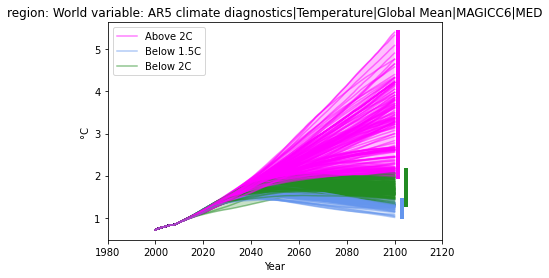

In [ ]:
df.filter(variable='*Temperature*').line_plot(color='Temperature',legend=True,alpha=0.5, fill_between=True,final_ranges=dict(linewidth=4))

# **scenario values of primary energy from coal vs. CO2 emissions**

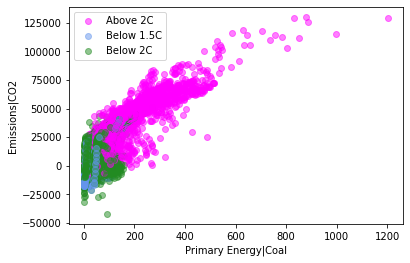

In [ ]:
(df.filter(region='World').scatter(x='Primary Energy|Coal', y='Emissions|CO2',color='Temperature', alpha=0.5, legend=True))

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


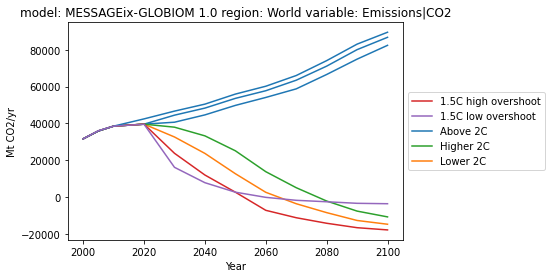

In [ ]:
df = pyam.read_iiasa(
    'iamc15',
    model='MESSAGEix*',
    variable=['Emissions|CO2', 'Primary Energy|Coal'],
    region='World',
    meta=['category']
)

ax = df.filter(variable='Emissions|CO2').line_plot(
    color='category',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

# **Scenario-region combinations with multiple subsectors of CO2 emissions**

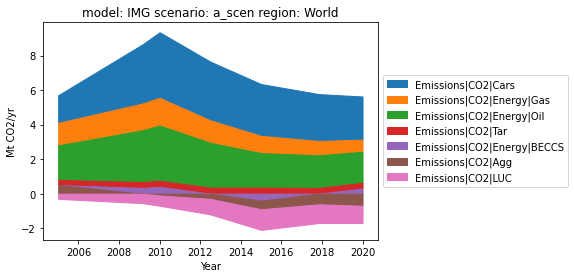

In [ ]:
import numpy as np
import pandas as pd
import pyam
%matplotlib inline
import matplotlib.pyplot as plt

df = pyam.IamDataFrame(pd.DataFrame([
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Oil', 'Mt CO2/yr', 2, 3.2, 2.0, 1.8],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Gas', 'Mt CO2/yr', 1.3, 1.6, 1.0, 0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|BECCS', 'Mt CO2/yr', 0.0, 0.4, -0.4, 0.3],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Cars', 'Mt CO2/yr', 1.6, 3.8, 3.0, 2.5],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Tar', 'Mt CO2/yr', 0.3, 0.35, 0.35, 0.33],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Agg', 'Mt CO2/yr', 0.5, -0.1, -0.5, -0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|LUC', 'Mt CO2/yr', -0.3, -0.6, -1.2, -1.0]
    ],
    columns=['model', 'scenario', 'region', 'variable', 'unit', 2005, 2010, 2015, 2020],
))
df.stack_plot();

# Above plot clearly shows that CARs and Oil are biggest contributor to the CO2 Emission

# **Covid19 Lockdown has helped reduce CO2 emission**

Here is an infographic - https://drive.google.com/file/d/1ntNosOA1RrK-Yu1nS1W-EI3Ncf70Y1Lu/view?usp=sharing

(Ref: https://www2.iqair.com/sites/default/files/documents/REPORT-COVID-19-Impact-on-Air-Quality-in-10-Major-Cities_V6.pdf)

Another very nice example

Ref: https://www.statista.com/chart/21414/record-drop-in-carbon-emissions/

![alt text](https://cdn.statcdn.com/Infographic/images/normal/21414.jpeg)


Future Work:

--Learning Climate Model

--Temperature Prediction

--Timeseries Analysis

--Correlate Global Warming With Geographic Region And Population Density
-- Map deforestation
